<a href="https://colab.research.google.com/github/trongquy03/Predict_Diamond_Price/blob/main/Predict_Diamond_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# url = '/content/Diamond Price Prediction.csv'
url = '/content/drive/MyDrive/Colab Notebooks/Diamond-Price-Prediction.csv'
datas = pd.read_csv(url, encoding="Latin-1")
datas.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
datas.shape

(53940, 10)

In [ ]:
datas.describe()

,Carat,Depth,Table,Price,X,Y,Z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Carat    53940 non-null  float64
 1   Cut      53940 non-null  object 
 2   Color    53940 non-null  object 
 3   Clarity  53940 non-null  object 
 4   Depth    53940 non-null  float64
 5   Table    53940 non-null  float64
 6   Price    53940 non-null  int64  
 7   X        53940 non-null  float64
 8   Y        53940 non-null  float64
 9   Z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
s = (datas.dtypes == "object")
object_cols = list(s[s].index)
print("Categorical Variables:")
print(object_cols)

Categorical Variables:
['Cut', 'Color', 'Clarity']


In [ ]:
from sklearn.preprocessing import LabelEncoder 

# Make copy to avoid changing original data 
label_data = datas.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

NameError: ignored

In [ ]:

datas = datas.drop(datas[datas['Carat']== 0].index)
datas = datas.drop(datas[datas['Cut']== 0].index)
datas = datas.drop(datas[datas['Color']== 0].index)
datas = datas.drop(datas[datas['Clarity']== 0].index)
datas = datas.drop(datas[datas['Depth']== 0].index)
datas = datas.drop(datas[datas['Table']== 0].index)
datas = datas.drop(datas[datas['Price']== 0].index)
datas = datas.drop(datas[datas['X']== 0].index)
datas = datas.drop(datas[datas['Y']== 0].index)
datas = datas.drop(datas[datas['Z']== 0].index)
datas.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Price'}, xlabel='Price'>

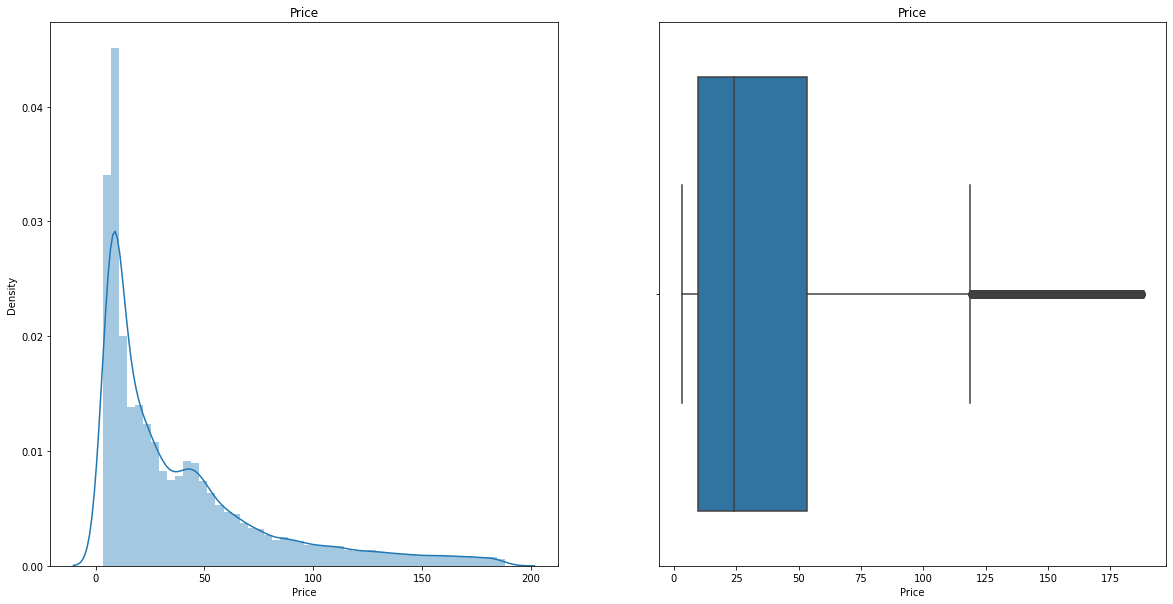

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Price')
sns.distplot(datas.Price/100)

plt.subplot(1,2,2)
plt.title('Price')
sns.boxplot(x=datas.Price/100)

In [ ]:
datas.dropna(inplace=True)
datas.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
print(datas.Price.describe(percentiles=[0.25,0.5,0.75,0.85,0.90,1]))
print(datas.Price.median())

count    53920.000000
mean      3930.993231
std       3987.280446
min        326.000000
25%        949.000000
50%       2401.000000
75%       5323.250000
85%       7665.000000
90%       9818.100000
100%     18823.000000
max      18823.000000
Name: Price, dtype: float64
2401.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
s = (datas.dtypes == "object")
object_cols = list(s[s].index)
print("Categorical Variables:")
print(object_cols)

Categorical Variables:
['Cut', 'Color', 'Clarity']


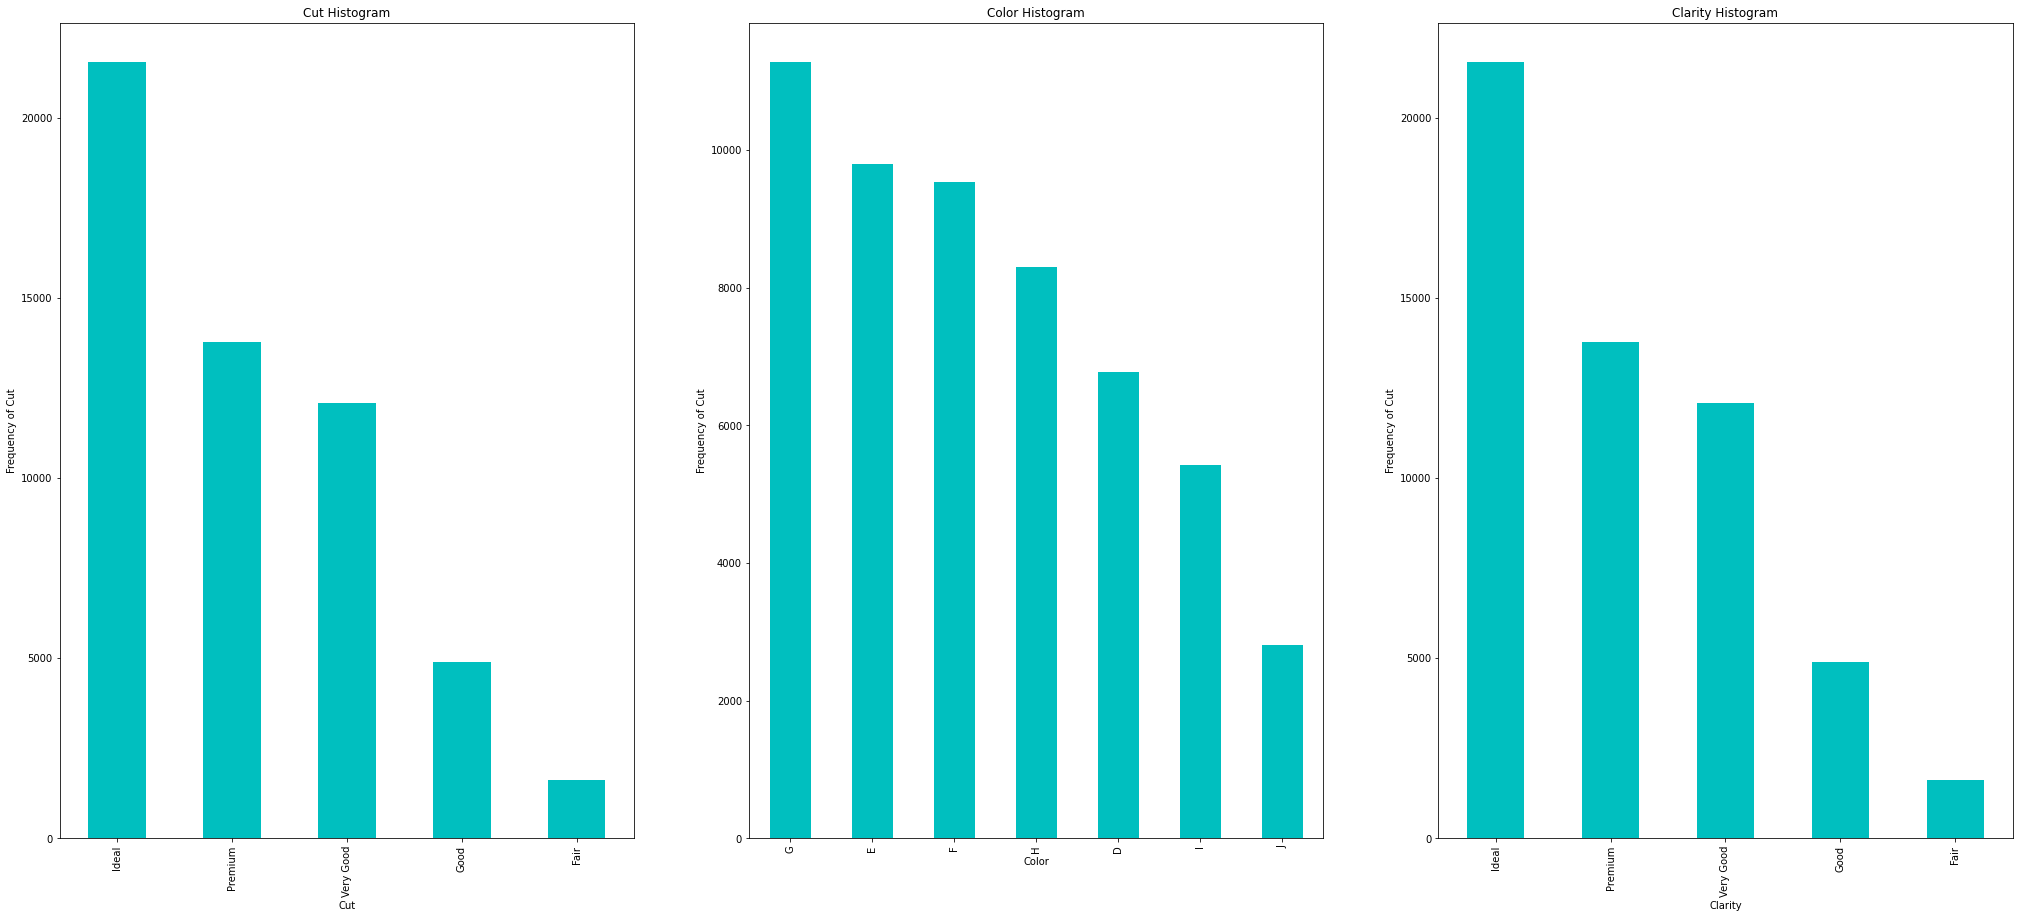

In [ ]:
plt.figure(figsize=(35, 15))

plt.subplot(1,3,1)
plt1 = datas.Cut.value_counts().plot(kind = 'bar', color='c')
plt.title('Cut Histogram')
plt1.set(xlabel = 'Cut', ylabel = 'Frequency of Cut')

plt.subplot(1,3,2)
plt1 = datas.Color.value_counts().plot(kind = 'bar', color='c')
plt.title('Color Histogram')
plt1.set(xlabel = 'Color', ylabel = 'Frequency of Cut')

plt.subplot(1,3,3)
plt1 = datas.Cut.value_counts().plot(kind = 'bar', color='c')
plt.title('Clarity Histogram')
plt1.set(xlabel = 'Clarity', ylabel = 'Frequency of Cut')

plt.show()

In [ ]:
datas.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


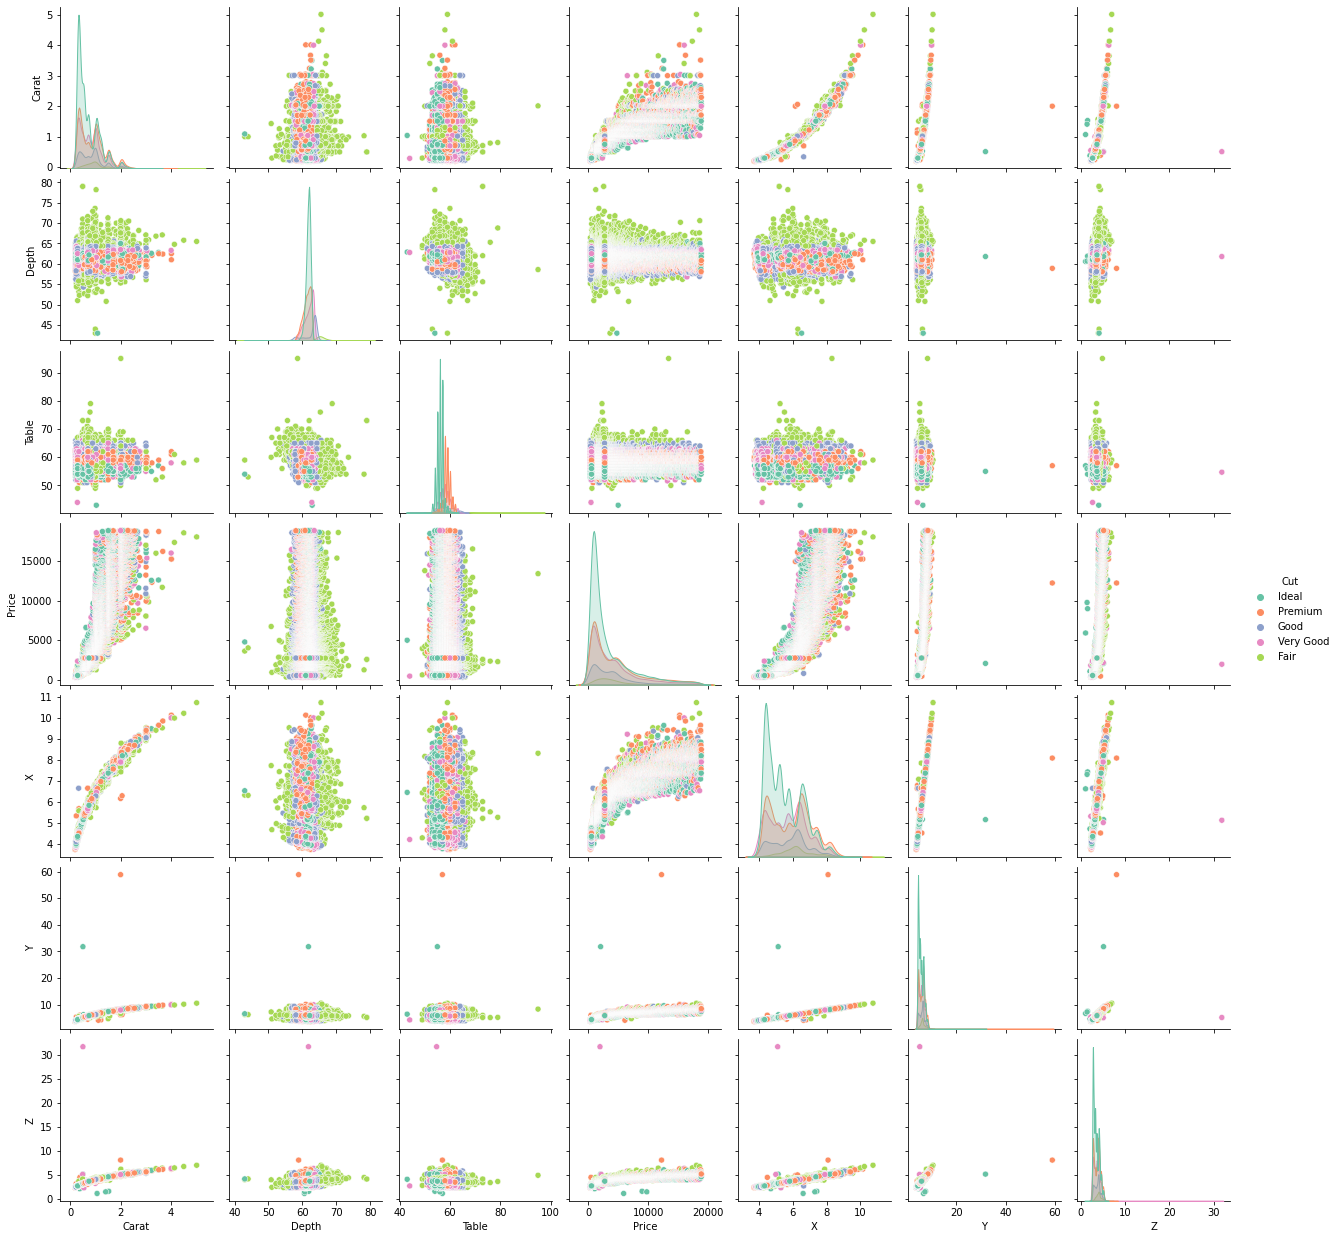

In [ ]:
# pair = datas[['Carat', 'Color', 'Clarity', 'Depth','Table', 'Price', 'X', 'Y', 'Z']]
# sns.pairplot(pair, hue= "Cut", palette='Set2')
# plt.show()

sns.pairplot(datas, hue="Cut", palette='Set2')
plt.show()

Text(0.5, 1.0, '("Regression Line on Price vs \'y\'", False)')

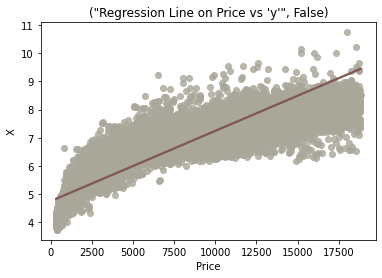

In [ ]:
from matplotlib import colors
ax = sns.regplot(x='Price',y='X', data=datas, fit_reg=True, scatter_kws={"color":"#a9a799"}, line_kws={"color": "#835656"})
ax.set_title(("Regression Line on Price vs 'y'",colors=="#4e4c39"))

Text(0.5, 1.0, '("Regression Line on Price vs \'y\'", False)')

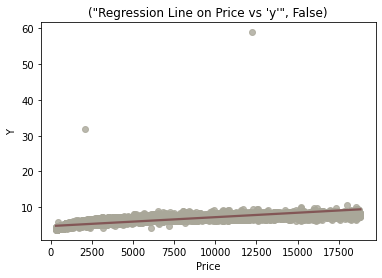

In [ ]:
ax = sns.regplot(x='Price',y='Y', data=datas, fit_reg=True, scatter_kws={"color":"#a9a799"}, line_kws={"color": "#835656"})
ax.set_title(("Regression Line on Price vs 'y'",colors=="#4e4c39"))

Text(0.5, 1.0, '("Regression Line on Price vs \'y\'", False)')

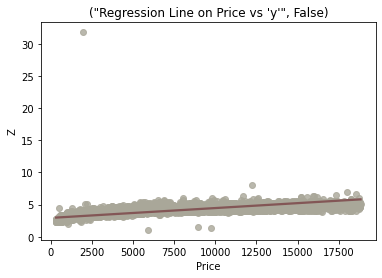

In [ ]:
ax = sns.regplot(x='Price',y='Z', data=datas, fit_reg=True, scatter_kws={"color":"#a9a799"}, line_kws={"color": "#835656"})
ax.set_title(("Regression Line on Price vs 'y'",colors=="#4e4c39"))

Text(0.5, 1.0, '("Regression Line on Price vs \'y\'", False)')

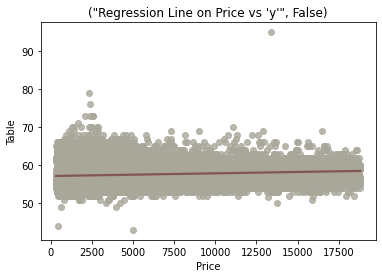

In [ ]:
ax = sns.regplot(x='Price',y='Table', data=datas, fit_reg=True, scatter_kws={"color":"#a9a799"}, line_kws={"color": "#835656"})
ax.set_title(("Regression Line on Price vs 'y'",colors=="#4e4c39"))

In [ ]:
#Dropping the outliers
datas = datas[(datas['X']>2) & (datas['X']<9.5)]
datas = datas[(datas['Y']<10)]
datas = datas[(datas['Z']>1) & (datas['Z']<10)]
datas = datas[(datas['Table']>40) & (datas['Table']<70)]

datas.shape

(53888, 10)

In [ ]:
datas.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data_lr = datas[['Carat', 'Cut', 'Color', 'Clarity', 'Depth','Table', 'Price', 'X', 'Y', 'Z']]
data_lr.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#Defining the map function
def dummies(x,datas):
  temp = pd.get_dummies(datas[x], drop_first = True)
  datas = pd.concat([datas, temp], axis = 1)
  datas.drop([x], axis = 1, inplace=True)
  return datas

#Applying the function to the cars_lr
data_lr = dummies('Clarity', data_lr)
data_lr = dummies('Color', data_lr)
data_lr = dummies('Cut', data_lr)


In [ ]:
data_lr.head()

,Carat,Depth,Table,Price,X,Y,Z,IF,SI1,SI2,...,E,F,G,H,I,J,Good,Ideal,Premium,Very Good
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
#@title Label encoding the data
from sklearn import preprocessing as pps
#Make copy to avoid changing original data
lb_data = datas.copy()

#Apply label encoder to each column with categorical data
label_encoder = pps.LabelEncoder()
# for col in object_cols:
#   lb_data[col] = label_encoder.fit_transform(lb_data[col])
lb_data['Cut'] = label_encoder.fit_transform(lb_data['Cut'])
lb_data['Color'] = label_encoder.fit_transform(lb_data['Color'])
lb_data['Clarity'] = label_encoder.fit_transform(lb_data['Clarity'])

lb_data.head()


,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from sklearn import model_selection
#@title Train_Test Split and feature scaling
from sklearn.model_selection import train_test_split as tts

np.random.seed(11)
data_train, data_test = tts(data_lr, train_size = 0.8 ,test_size = 0.2, random_state = 100)
lb_train, lb_test = tts(lb_data, train_size = 0.8, test_size = 0.2, random_state = 100)


In [ ]:
data_train.head()

,Carat,Depth,Table,Price,X,Y,Z,IF,SI1,SI2,...,E,F,G,H,I,J,Good,Ideal,Premium,Very Good
52807,0.71,63.4,57.0,2572,5.71,5.67,3.61,0,0,0,...,0,0,0,0,1,0,0,0,0,1
21799,1.20,61.2,58.0,9873,6.84,6.88,4.20,0,0,0,...,0,0,1,0,0,0,0,0,1,0
24628,2.01,60.2,61.0,12963,8.23,8.16,4.93,0,0,0,...,0,0,0,0,0,1,0,0,1,0
23515,1.57,62.4,56.0,11523,7.46,7.41,4.64,0,1,0,...,0,1,0,0,0,0,0,1,0,0
45030,0.54,61.5,57.0,1637,5.25,5.22,3.22,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
data_train.describe()

,Carat,Depth,Table,Price,X,Y,Z,IF,SI1,SI2,...,E,F,G,H,I,J,Good,Ideal,Premium,Very Good
count,43110.000000,43110.000000,43110.000000,43110.000000,43110.000000,43110.000000,43110.000000,43110.000000,43110.000000,43110.000000,...,43110.000000,43110.000000,43110.000000,43110.000000,43110.000000,43110.000000,43110.000000,43110.000000,43110.000000,43110.000000
mean,0.799593,61.747532,57.455602,3947.230782,5.736170,5.738113,3.542092,0.033519,0.240872,0.171190,...,0.181976,0.175968,0.209047,0.152981,0.102064,0.052842,0.091325,0.398817,0.256089,0.224565
std,0.473424,1.427371,2.212847,3995.413210,1.120531,1.112438,0.692425,0.179989,0.427618,0.376679,...,0.385830,0.380798,0.406632,0.359973,0.302737,0.223720,0.288073,0.489661,0.436477,0.417300
min,0.200000,43.000000,44.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,2419.500000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,5372.000000,6.550000,6.540000,4.040000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,3.240000,78.200000,69.000000,18818.000000,9.490000,9.420000,6.160000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


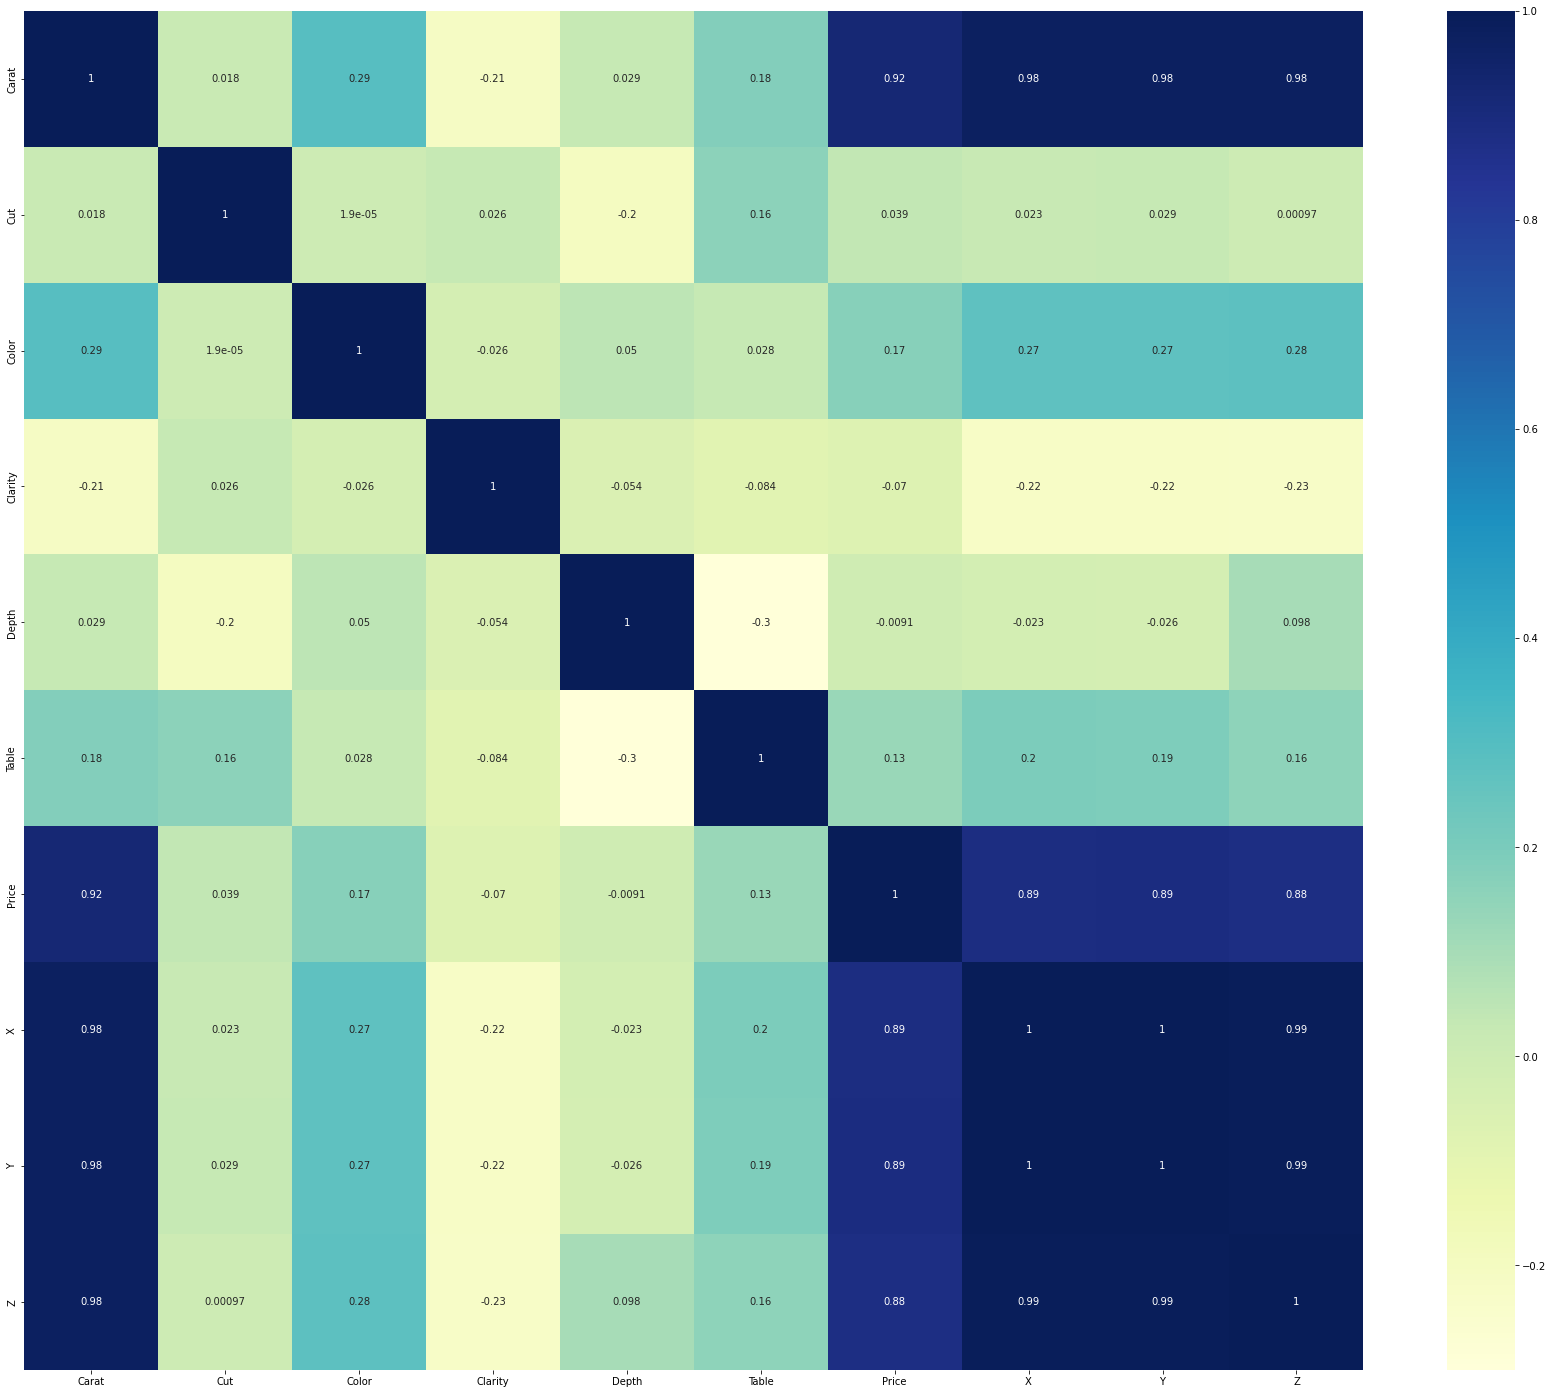

In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(lb_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
#Dividing data into X and y variables to train
#dummy
yd_train = data_train.pop('Price')
Xd_train = data_train.copy()
#label
yl_train = lb_train.pop('Price')
Xl_train = lb_train

In [ ]:
#Dividing data into X and y variables to test
#dummy
yd_test = data_test.pop('Price')
Xd_test = data_test.copy()
#label
yl_test = lb_test.pop('Price')
Xl_test = lb_test

In [ ]:
#@title Model Building
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
# Plot learning curve
def plot_Learning_curve(model, x_train, y_train):
    pipeline = make_pipeline(StandardScaler(),model)
    # Use learning curve to get training and test scores along with train sizes
    train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=x_train, y=y_train,
                                                           cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    # Plot
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

------------- Learning Curve for dummy -------------


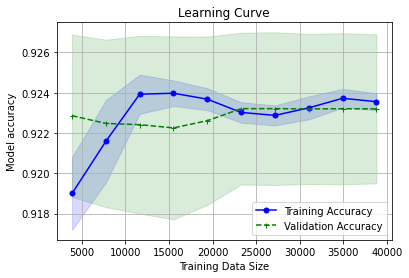

------------- Learning Curve for label -------------


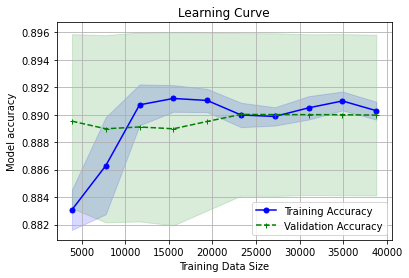

In [ ]:
#Simple linear regression for dummy
lmd = LinearRegression()
lmd.fit(Xd_train,yd_train)

#Simple linear regression for label
lml = lm_d = LinearRegression()
lml.fit(Xl_train,yl_train)

# Plot Learning Curve
print('------------- Learning Curve for dummy -------------')
plot_Learning_curve(lmd, Xd_train, yd_train)
print('------------- Learning Curve for label -------------')
plot_Learning_curve(lml, Xl_train, yl_train)

In [ ]:
data_test.head()

,Carat,Depth,Table,X,Y,Z,IF,SI1,SI2,VS1,...,E,F,G,H,I,J,Good,Ideal,Premium,Very Good
17825,1.50,65.5,53.0,7.14,7.11,4.67,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2961,0.91,60.7,57.0,6.26,6.23,3.79,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
23373,0.33,62.1,58.0,4.43,4.40,2.74,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
43715,0.61,57.4,60.9,5.60,5.65,3.23,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31899,0.30,61.4,57.0,4.34,4.29,2.65,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
lb_test.head()

,Carat,Cut,Color,Clarity,Depth,Table,X,Y,Z
17825,1.50,0,4,3,65.5,53.0,7.14,7.11,4.67
2961,0.91,2,6,4,60.7,57.0,6.26,6.23,3.79
23373,0.33,3,0,3,62.1,58.0,4.43,4.40,2.74
43715,0.61,0,5,5,57.4,60.9,5.60,5.65,3.23
31899,0.30,2,3,4,61.4,57.0,4.34,4.29,2.65


In [ ]:
#Root mean square error of dummy
data_rmse = np.sqrt(mean_squared_error(yd_test.to_numpy(), lmd.predict(Xd_test)))
print("Mean squre error of dummy variable:", data_rmse)

#Root mean square error of label
lb_rmse = np.sqrt(mean_squared_error(yl_test.to_numpy(), lml.predict(Xl_test)))
print("Mean squre error of label variable:", lb_rmse)

Mean squre error of dummy variable: 1094.8867489820914
Mean squre error of label variable: 1311.4344277163862


In [ ]:
#Simple Linear regression
plm = LinearRegression()
poly = PolynomialFeatures(3)
Xp_train = poly.fit_transform(Xd_train)
yp_train = yd_train
Xp_test = poly.fit_transform(Xd_test)
yp_test = yd_test
plm.fit(Xp_train, yp_train)


LinearRegression()

In [ ]:
dmp_rmse = np.sqrt(mean_squared_error(yd_test.to_numpy(), plm.predict(Xp_test)))
print("Root Mean square error of Polynomial regression with dumy:",dmp_rmse)
print("Root Mean square error of simple linear regression with dumy:",data_rmse)

Root Mean square error of Polynomial regression with dumy: 1437.6183332664918
Root Mean square error of simple linear regression with dumy: 1094.8867489820914


In [ ]:
plm_s = LinearRegression()
poly_s = PolynomialFeatures(3)
Xp_train_s = poly_s.fit_transform(Xl_train)
yp_train_s = yl_train

Xp_test_s = poly_s.fit_transform(Xl_test)
yp_test_s = yl_test
plm_s.fit(Xp_train_s, yp_train_s)

LinearRegression()

In [ ]:
pipe_score = []
pipe_dict = {0: "Simple Linear Regression with Dummy", 1: "Simple Linear Regression with Label", 2:"Polynomial Linear regression with Dummy", 3:"Polynomial Linear regression with Label"}
pipe_score.append(data_rmse)
pipe_score.append(lb_rmse)
pipe_score.append(dmp_rmse)
pipe_score.append(dmp_rmse_s)

for i in range(4):
  print("%s: %f " % (pipe_dict[i], pipe_score[i]))

Simple Linear Regression with Dummy: 1104.760373 
Simple Linear Regression with Label: 1323.437184 
Polynomial Linear regression with Dummy: 532.369148 
Polynomial Linear regression with Label: 947.986580 


R^2: 0.8665888791736257
Adjusted R^2: 0.8241688089585624
MAE: 334.67204211180336
MSE: 2066746.472143926
RMSE: 1437.6183332664918


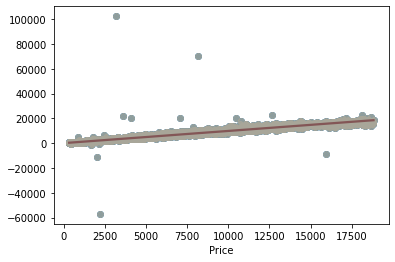

In [ ]:
#Polynomial regression
yp_pred = plm.predict(Xp_test)
print("R^2:", metrics.r2_score(yp_test, yp_pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(yp_test, yp_pred))*(len(yp_test)-1)/(len(yp_test)-Xp_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(yp_test,yp_pred))
print("MSE:",metrics.mean_squared_error(yp_test,yp_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(yp_test, yp_pred)))

''' PLOT LINE'''
plt.scatter(yp_test,yp_pred);
sns.regplot(x=yp_test,y=yp_pred, scatter_kws={"color":"#a9a799"}, line_kws={"color": "#835656"});
plt.show()

R^2: 0.9226174161052362
Adjusted R^2: 0.9224519149494262
MAE: 715.8167428871483
MSE: 1198776.9930965733
RMSE: 1094.8867489820914


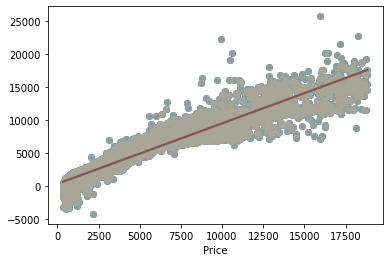

In [ ]:

#Simple Linear regression with dummy
yd_pred = lmd.predict(Xd_test)
print("R^2:", metrics.r2_score(yd_test, yd_pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(yd_test, yd_pred))*(len(yd_test)-1)/(len(yd_test)-Xd_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(yd_test,yd_pred))
print("MSE:",metrics.mean_squared_error(yd_test,yd_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(yd_test, yd_pred)))

''' PLOT LINE'''
plt.scatter(yd_test,yd_pred);
sns.regplot(x=yd_test,y=yd_pred, scatter_kws={"color":"#a9a799"}, line_kws={"color": "#835656"});
plt.show()

In [ ]:
#Simple linear regression with label
yl_pred = lml.predict(Xl_test)
print("R^2:", metrics.r2_score(yl_test, yl_pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(yl_test, yl_pred))*(len(yl_test)-1)/(len(yl_test)-Xl_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(yl_test,yl_pred))
print("MSE:",metrics.mean_squared_error(yl_test,yl_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(yl_test, yl_pred)))


R^2: 0.8889808267227104
Adjusted R^2: 0.8888880358089385
MAE: 834.089811954526
MSE: 1719860.2581998054
RMSE: 1311.4344277163862


In [ ]:
#@title Overfiting
from sklearn.linear_model import Ridge, Lasso
plm = Ridge(alpha=1)
lasso = Lasso(alpha=1.0)
poly = PolynomialFeatures(3)
Xp_train = poly.fit_transform(Xd_train)
yp_train = yd_train
Xp_test = poly.fit_transform(Xd_test)
yp_test = yd_test

plm.fit(Xp_train, yp_train)
lasso.fit(Xp_train, yp_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.359e+09, tolerance: 6.882e+07
  model = cd_fast.enet_coordinate_descent(


Lasso()

R^2: 0.9776776146282141
Adjusted R^2: 0.9705798768311439
MAE: 315.53393768350213
MSE: 345808.587254259
RMSE: 588.0549185699061


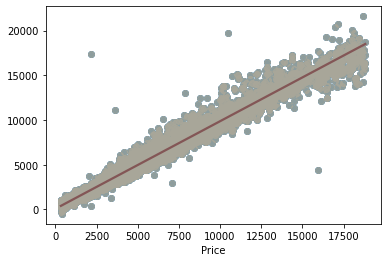

In [ ]:
#Polynomial Regression
yp_pred = plm.predict(Xp_test)
print("R^2:", metrics.r2_score(yp_test, yp_pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(yp_test, yp_pred))*(len(yp_test)-1)/(len(yp_test)-Xp_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(yp_test,yp_pred))
print("MSE:",metrics.mean_squared_error(yp_test,yp_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(yp_test, yp_pred)))

''' PLOT LINE'''
plt.scatter(yp_test,yp_pred);
sns.regplot(x=yp_test,y=yp_pred, scatter_kws={"color":"#a9a799"}, line_kws={"color": "#835656"});
plt.show()


In [ ]:
yp_pred = lasso.predict(Xp_test)
print("R^2:", metrics.r2_score(yp_test, yp_pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(yp_test, yp_pred))*(len(yp_test)-1)/(len(yp_test)-Xp_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(yp_test,yp_pred))
print("MSE:",metrics.mean_squared_error(yp_test,yp_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(yp_test, yp_pred)))

R^2: 0.9757945353422146
Adjusted R^2: 0.9680980441950651
MAE: 357.86912708195734
MSE: 374980.42425705044
RMSE: 612.3564519600087
